In [1]:
from segmentation_model import SegmentationModel

2022-07-26 23:46:19.426555: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
classifier_path = "mnist.pth"

In [17]:
model = SegmentationModel(classifier_path, cuda_rank= 1, output_size = 256 ,
                                        image_size = 256)

/home/jovyan/thesis/thesis_experiment_1/stylex


In [29]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2
from gray2color import gray2color
from matplotlib import pyplot as plt

In [37]:
c_pallet = np.array([[[0, 0, 0],
                      [204, 0, 0],
                      [76, 153, 0],
                      [204, 204, 0],
                      [51, 51, 255],
                      [204, 0, 204],
                      [0, 255, 255],
                      [255, 204, 204],
                      [102, 51, 0],
                      [255, 0, 0],
                      [102, 204, 0],
                      [255, 255, 0],
                      [0, 0, 153],
                      [0, 0, 204],
                      [255, 51, 153],
                      [0, 204, 204],
                      [0, 51, 0],
                      [255, 153, 51],
                      [0, 204, 0]]], np.uint8) / 255

In [9]:
import os

In [ ]:
model.model.cuda(1)

In [10]:
os.path.isdir("../data/Kaggle_FFHQ_Resized_256px/flickrfaceshq-dataset-nvidia-resized-256px/resized_sub/00001.jpg")

False

In [22]:
img = Image.open("../data/Kaggle_FFHQ_Resized_256px/flickrfaceshq-dataset-nvidia-resized-256px/resized_sub/00002.jpg")

In [23]:
convert_tensor = transforms.ToTensor()
tensor_img = convert_tensor(img)
print(tensor_img)

tensor([[[0.0078, 0.0039, 0.0078,  ..., 0.0314, 0.0314, 0.0314],
         [0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0314, 0.0314],
         [0.0078, 0.0078, 0.0078,  ..., 0.0353, 0.0353, 0.0353],
         ...,
         [0.4314, 0.4353, 0.4275,  ..., 0.8157, 0.7882, 0.7451],
         [0.4235, 0.4235, 0.4275,  ..., 0.7922, 0.8039, 0.8275],
         [0.4275, 0.4235, 0.4196,  ..., 0.7804, 0.7961, 0.8314]],

        [[0.0078, 0.0039, 0.0078,  ..., 0.0118, 0.0118, 0.0118],
         [0.0078, 0.0078, 0.0078,  ..., 0.0118, 0.0118, 0.0118],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0980, 0.1020, 0.1020,  ..., 0.5098, 0.4824, 0.4392],
         [0.1020, 0.1020, 0.1020,  ..., 0.4863, 0.4980, 0.5216],
         [0.1059, 0.1020, 0.0941,  ..., 0.4745, 0.4902, 0.5255]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.

type <class 'numpy.ndarray'>
dtype float16
mask_pred shape: <class 'PIL.Image.Image'>


/tmp/ipykernel_63266/2952436202.py:21: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  mask_pred=mask_pred.resize((256,256), Image.NEAREST)


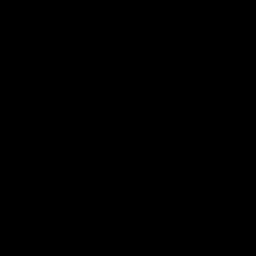

In [38]:
inputs = tensor_img
inputs = inputs.cuda(1)
outputs = model.get_segmentation_logits(inputs.unsqueeze(0))
# imname = os.path.basename(dataset.images[i])
# fname,ext = os.path.splitext(imname)
# print(fname)
t_npy = outputs.detach().cpu().numpy()
t_npy = t_npy.astype(np.float16)
        # print("Numpy:",type(t_npy))
        # savez_compressed('data.npz', data)
# savez_compressed('./flickrfaceshq-dataset-nvidia-resized-256px/logits/'+fname+'.npz', t_npy)
print("type",type(t_npy))
print("dtype",t_npy.dtype)
        # print("logits",outputs)
        # print("Tensor on cuda",outputs.is_cuda)
_, pred = torch.max(outputs, 1)
pred = pred.data.cpu().numpy().squeeze().astype(np.uint8)
        # print(type(pred))
mask_pred = Image.fromarray(pred)
print("mask_pred shape:", type(mask_pred))
mask_pred=mask_pred.resize((256,256), Image.NEAREST)
display(mask_pred)
pix = np.array(mask_pred)
        # print(type(pix))
        # mask = cv2.imread('../gray.png', 0)
rgb = gray2color(pix, use_pallet=None, custom_pallet=c_pallet)
        # print(type(rgb))
im = Image.fromarray(rgb)
im.save('../data/Kaggle_FFHQ_Resized_256px/flickrfaceshq-dataset-nvidia-resized-256px/seg/'+ "test_seg" + '.png')
        # print(dataset.images[i])
            # mask_pred.save(dataset.images[i].replace(imname,'parsings/'+imname[:-4]+'.png'))
        # mask_pred.save('./flickrfaceshq-dataset-nvidia-resized-256px/seg/'+ str(i) + '.png')
        # except FileNotFoundError:
        #     os.makedirs(os.path.join(os.path.dirname(dataset.images[i]),'parsings'))
        #     mask_pred.save(dataset.images[i].replace(imname,'parsings/'+imname[:-4]+'.png'))

In [1]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [2]:
torch.cuda.current_device()

0

In [3]:
import torch
torch.cuda.mem_get_info(0)

(1339359232, 47850782720)

In [5]:
t = torch.cuda.get_device_properties(1).total_memory
print(t)
r = torch.cuda.memory_reserved(1)
print(r)
a = torch.cuda.memory_allocated(1)
print(a)
f = r-a  # free inside reserved
print(f)

47850782720
0
0
0
